<a href="https://colab.research.google.com/github/evie1224/DAStudy-sun2/blob/main/KHJ/Bank_Churn_Data_HJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as no
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score ,f1_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

import shap
from keras.models import Sequential
from keras.layers import LSTM, Dense, Input, Concatenate
from keras.models import Model
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats
import warnings
warnings.filterwarnings("ignore")
sns.set(style="darkgrid",font_scale=1.5)

In [ ]:
train= pd.read_csv ('/content/drive/MyDrive/Colab Notebooks/bank churn/train.csv')
test = pd.read_csv ('/content/drive/MyDrive/Colab Notebooks/bank churn/test.csv')

In [ ]:
df=train

In [ ]:
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [ ]:
print(df.describe())

                id    CustomerId    CreditScore            Age         Tenure  \
count  165034.0000  1.650340e+05  165034.000000  165034.000000  165034.000000   
mean    82516.5000  1.569201e+07     656.454373      38.125888       5.020353   
std     47641.3565  7.139782e+04      80.103340       8.867205       2.806159   
min         0.0000  1.556570e+07     350.000000      18.000000       0.000000   
25%     41258.2500  1.563314e+07     597.000000      32.000000       3.000000   
50%     82516.5000  1.569017e+07     659.000000      37.000000       5.000000   
75%    123774.7500  1.575682e+07     710.000000      42.000000       7.000000   
max    165033.0000  1.581569e+07     850.000000      92.000000      10.000000   

             Balance  NumOfProducts      HasCrCard  IsActiveMember  \
count  165034.000000  165034.000000  165034.000000   165034.000000   
mean    55478.086689       1.554455       0.753954        0.497770   
std     62817.663278       0.547154       0.430707        0.

In [ ]:
selected_data = ["CreditScore", "Geography", "Gender", "Age", "Tenure", "Balance", "NumOfProducts", "HasCrCard", "IsActiveMember", "EstimatedSalary", "Exited"]
df= df[selected_data]

In [ ]:
df["Exited"].replace({0:"No",1:"Yes"}, inplace=True)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,No
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,No
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,No
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,No
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,No


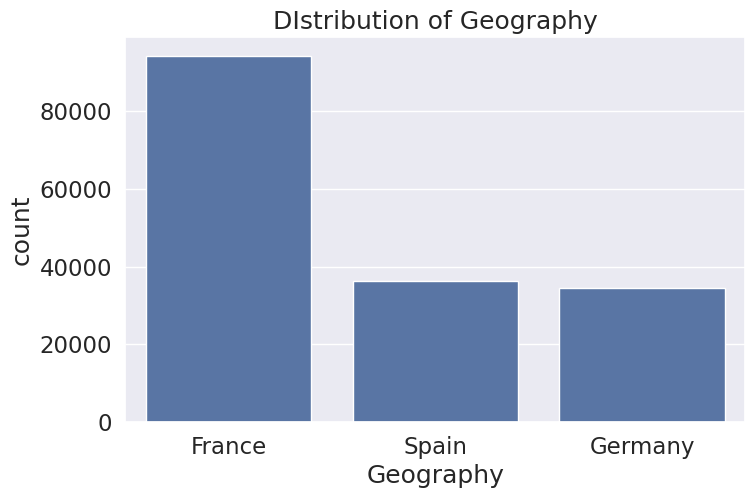

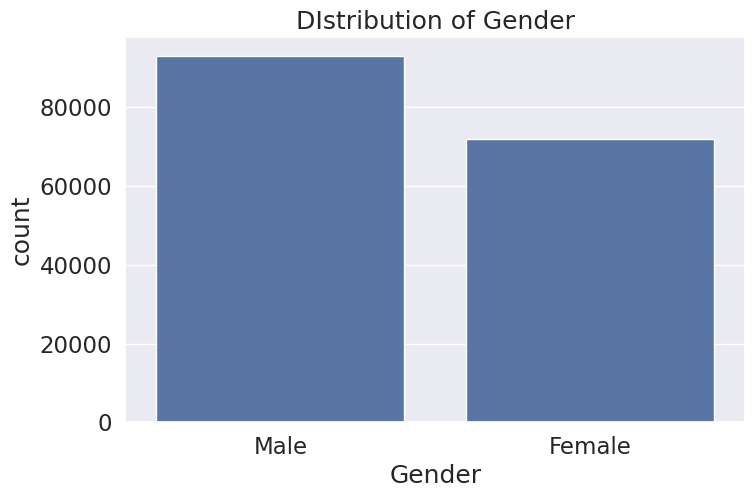

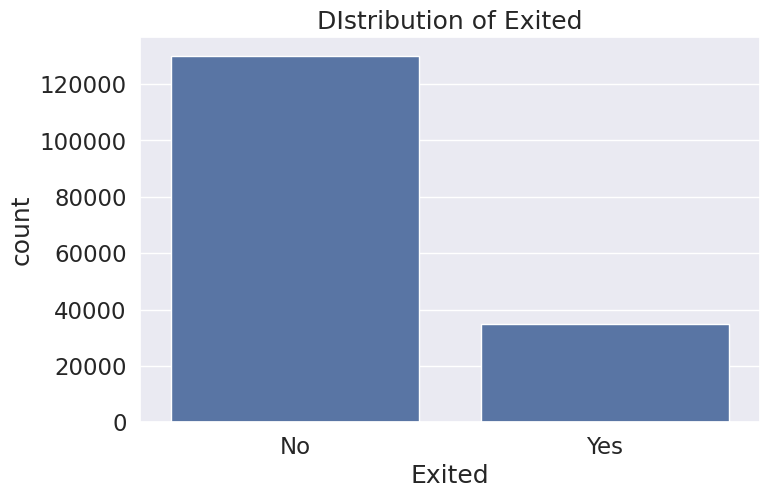

In [ ]:
categorical_columns = df.select_dtypes(include='object').columns
for column in categorical_columns:
        plt.figure(figsize=(8,5))
        sns.countplot(x=column, data=df)
        ax.bar_label(ax.containers[0],fontweight="black",size=15)
        plt.title(f'DIstribution of {column}')
        plt.show()

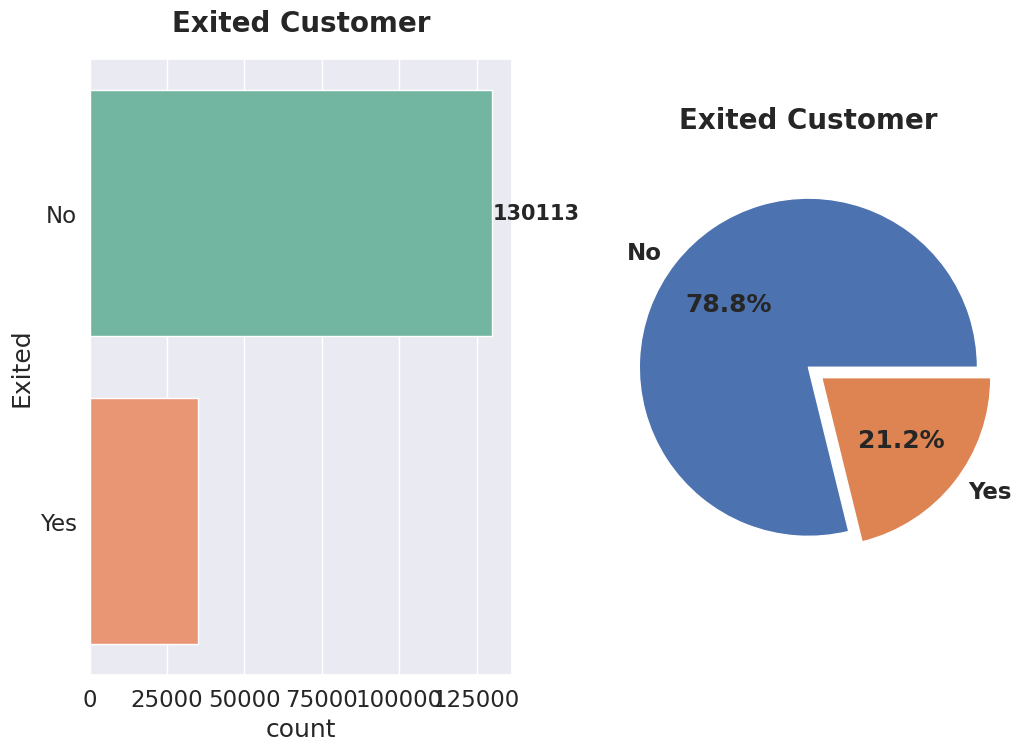

In [ ]:
count = df["Exited"].value_counts()

plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
ax=sns.countplot(df["Exited"],palette="Set2")
ax.bar_label(ax.containers[0],fontweight="black",size=15)
plt.title("Exited Customer",fontweight="black",size=20,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=count.index, autopct="%1.1f%%",
        textprops={"fontweight":"black"},explode=[0,0.1])
plt.title("Exited Customer",fontweight="black",size=20,pad=20)

plt.show()


In [ ]:
def countplot(column):
    plt.figure(figsize=(12,8))
    ax=sns.countplot(x=column, data=df, hue="Exited")

    for value in ax.patches:
        percentage="{:.1f}%".format(100*value.get_height()/len(df[column]))
        x=value.get_x()+value.get_width()/2 -0.05
        y=value.get_y()+value.get_height()
        ax.annotate(percentage,(x,y), ha='center', va='bottom', fontweight='bold', fontsize=12)

    plt.title(f"Exited Customer by {column}", fontsize=20, pad=20)
    plt.show()


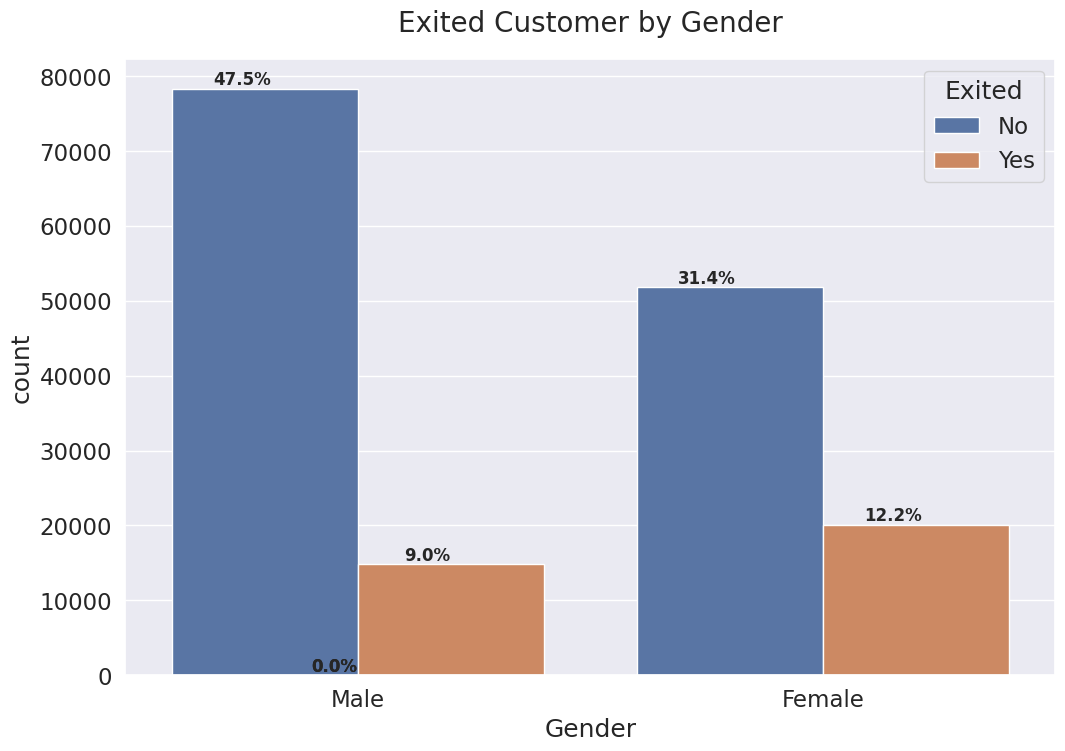

In [ ]:
countplot('Gender')

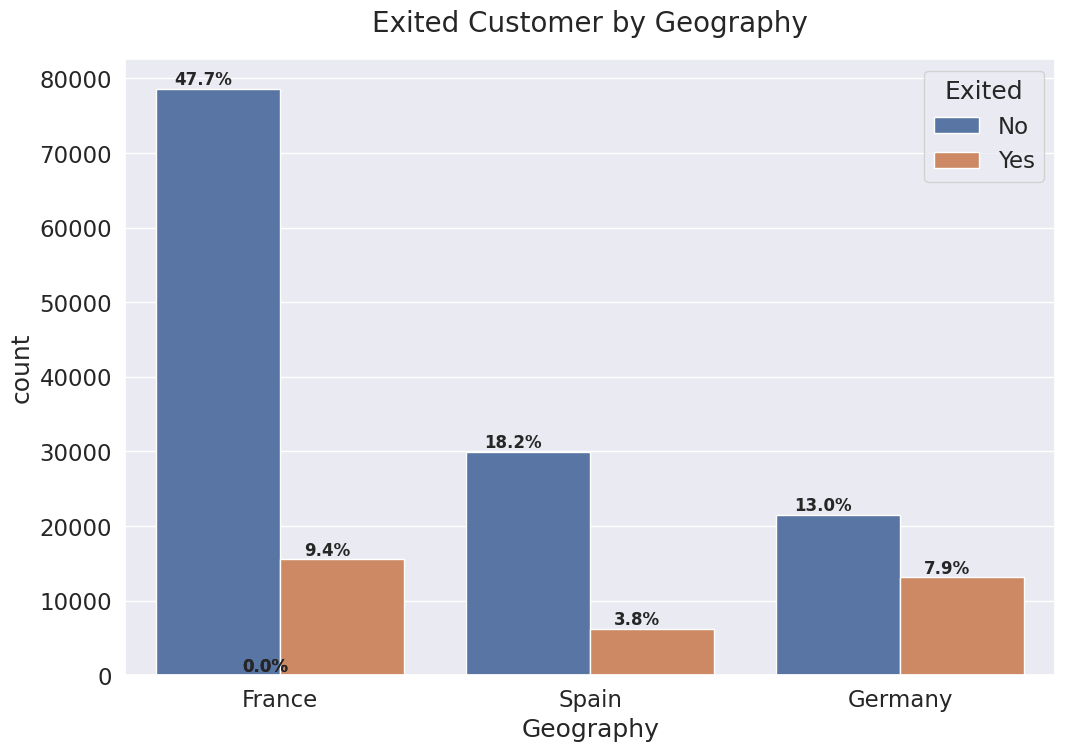

In [ ]:
countplot('Geography')

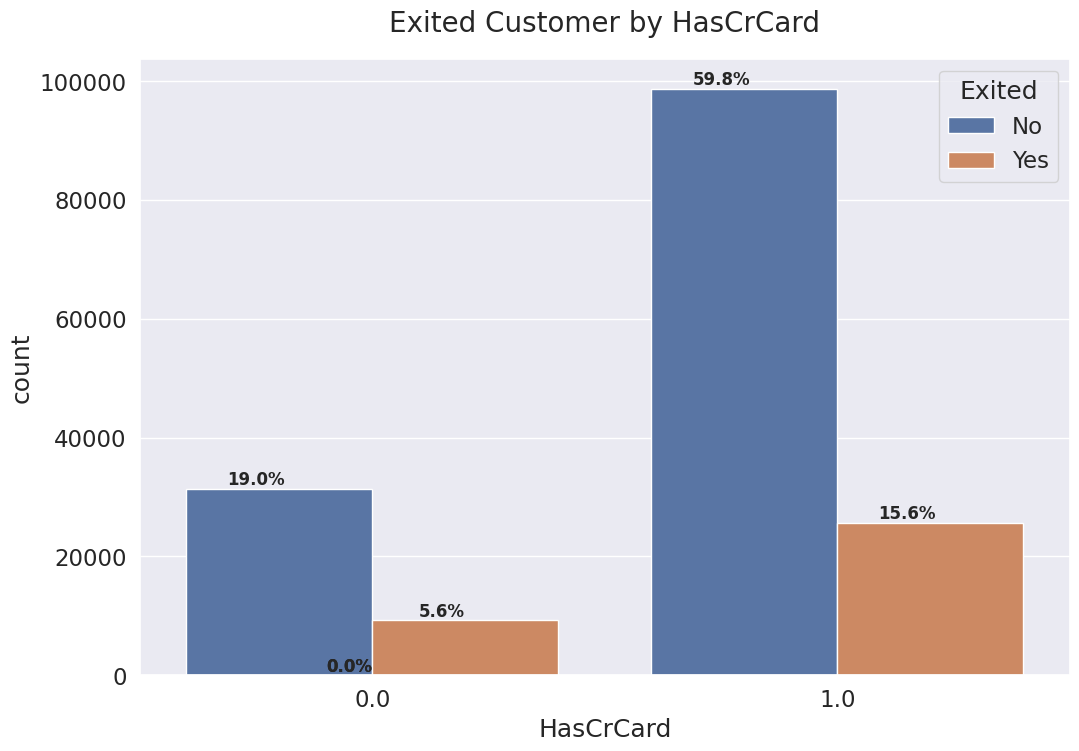

In [ ]:
countplot('HasCrCard')

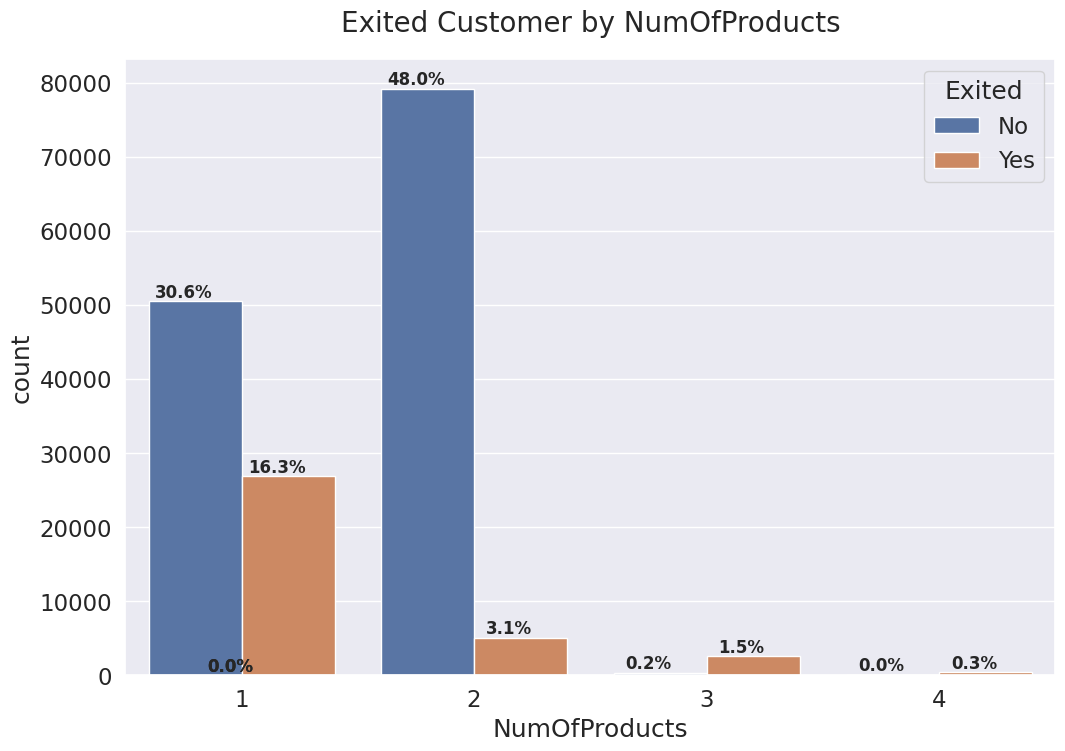

In [ ]:
countplot('NumOfProducts')

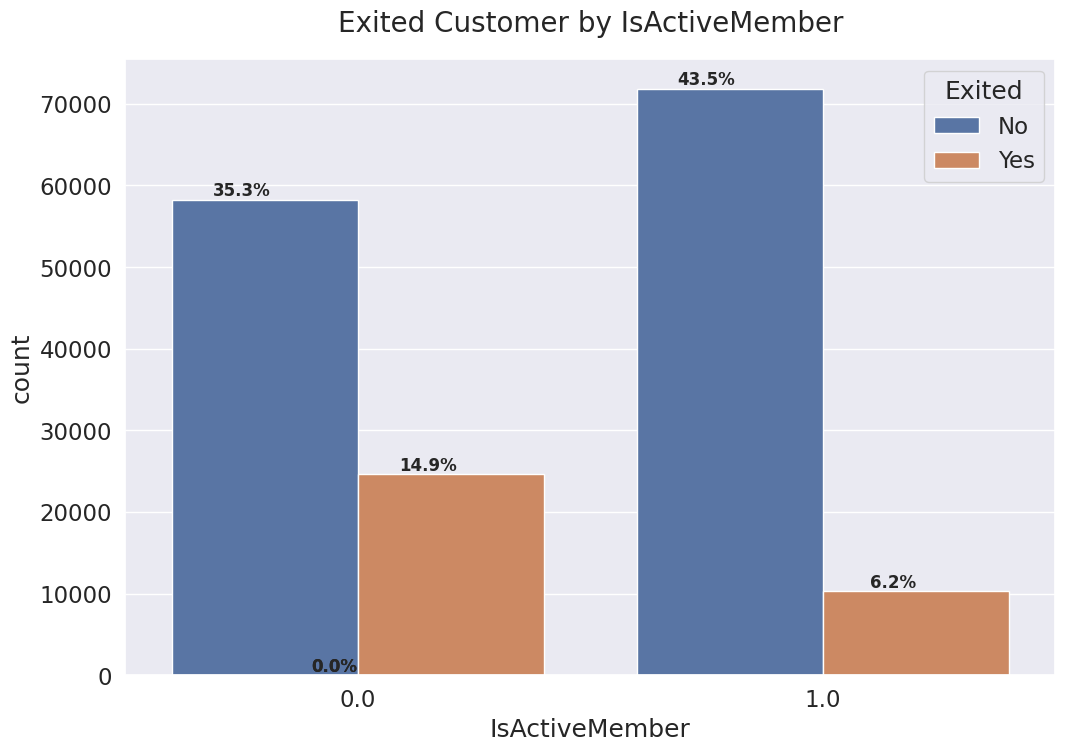

In [ ]:
countplot('IsActiveMember')

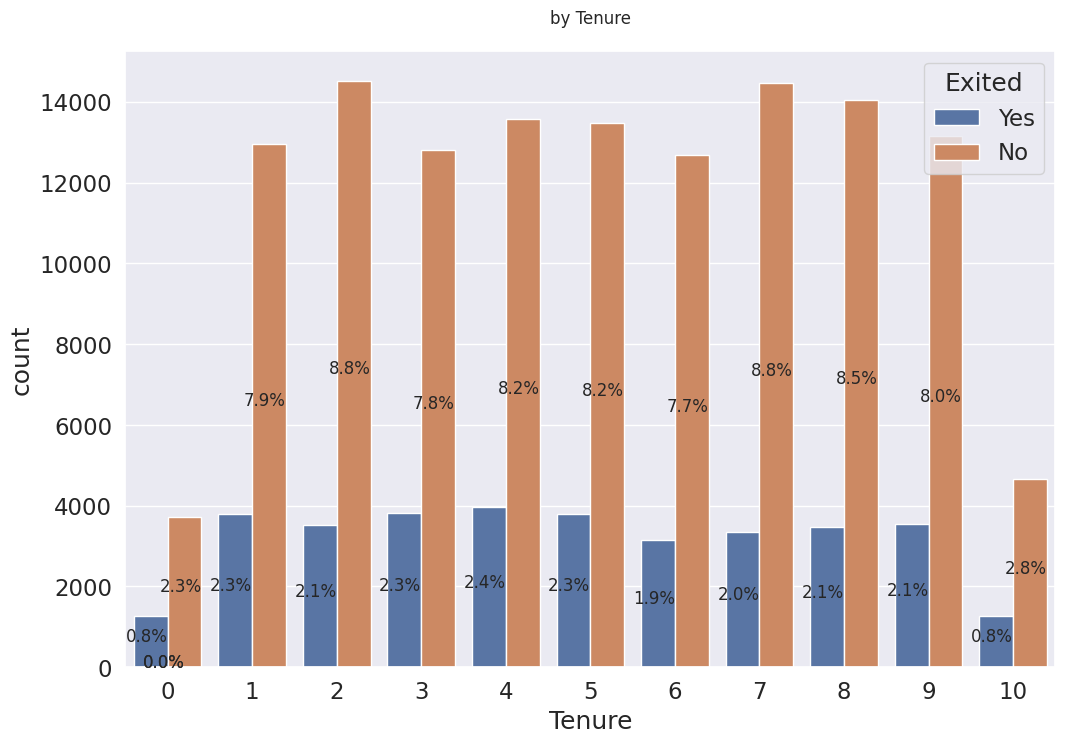

In [ ]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x="Tenure", data=df, hue="Exited")
for value in ax.patches:
    percentage="{:.1f}%".format(100*value.get_height()/len(df["Tenure"]))
    x=value.get_x()+value.get_width()/2-0.05
    y=value.get_y()+value.get_height()/2
    ax.annotate(percentage,(x,y),fontsize=12, ha="center")

plt.title("by Tenure", fontsize=12, pad=20)
plt.show()

In [ ]:
def continous_plot(column):
    plt.figure(figsize=(15,5))

    plt.subplot(1,2,1)
    sns.histplot(df[column], kde=True, color="blue", bins=30)
    plt.title(f"Distribution of {column}", fontweight="black", pad=20, size=15)

    plt.subplot(1,2,2)
    sns.boxplot(x=df["Exited"], y=df[column])
    plt.title(f"Distribution of {column} by Churn Status", fontweight="black", pad=20, size=15)
    plt.tight_layout()

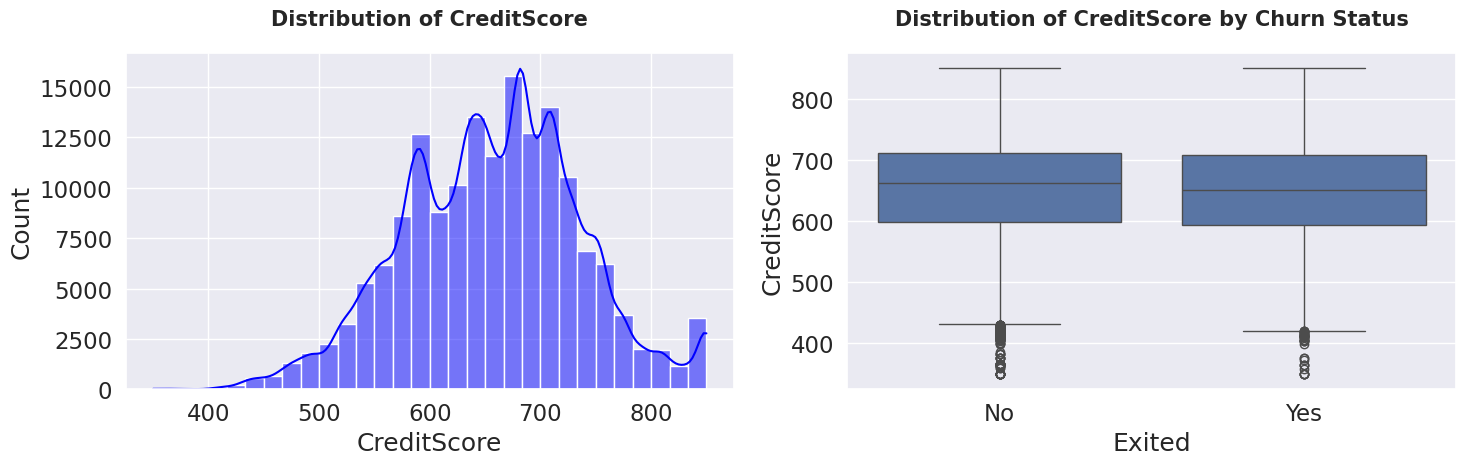

In [ ]:
continous_plot("CreditScore")

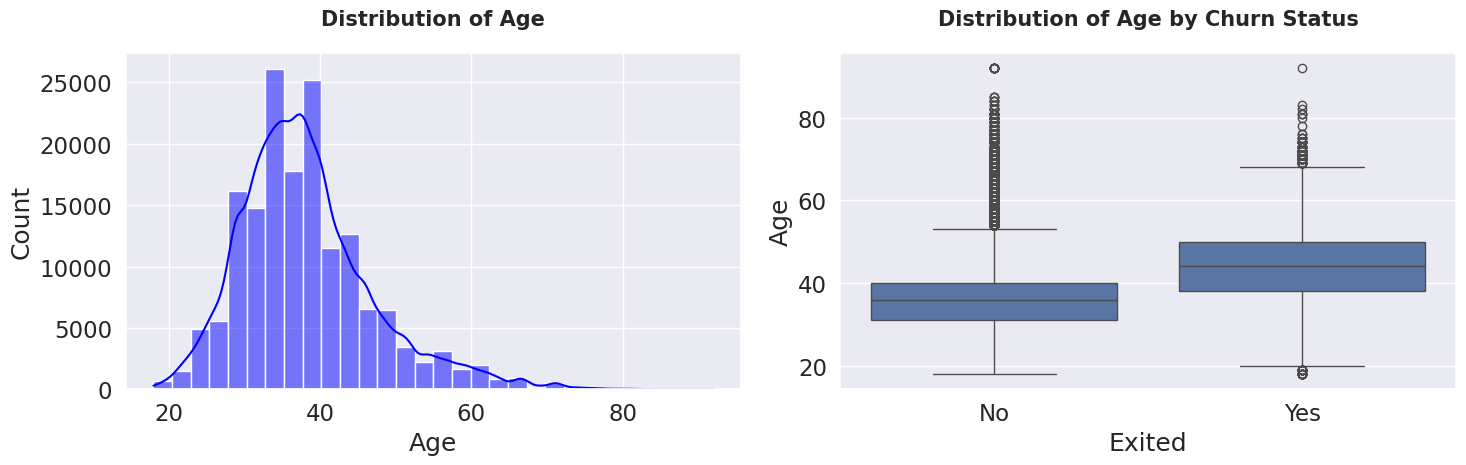

In [ ]:
continous_plot("Age")

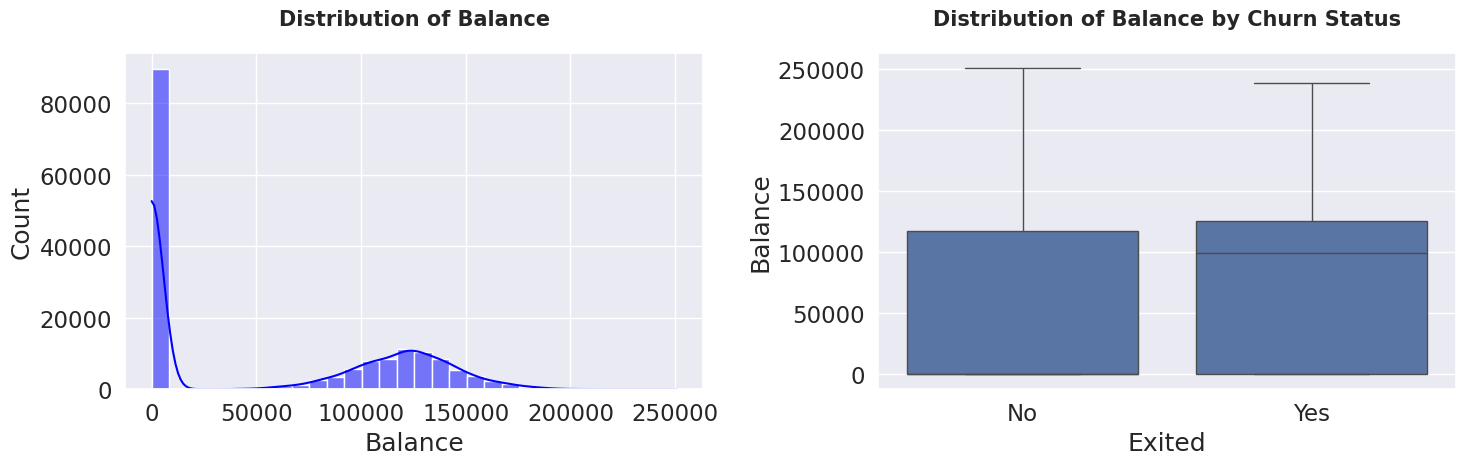

In [ ]:
continous_plot("Balance")

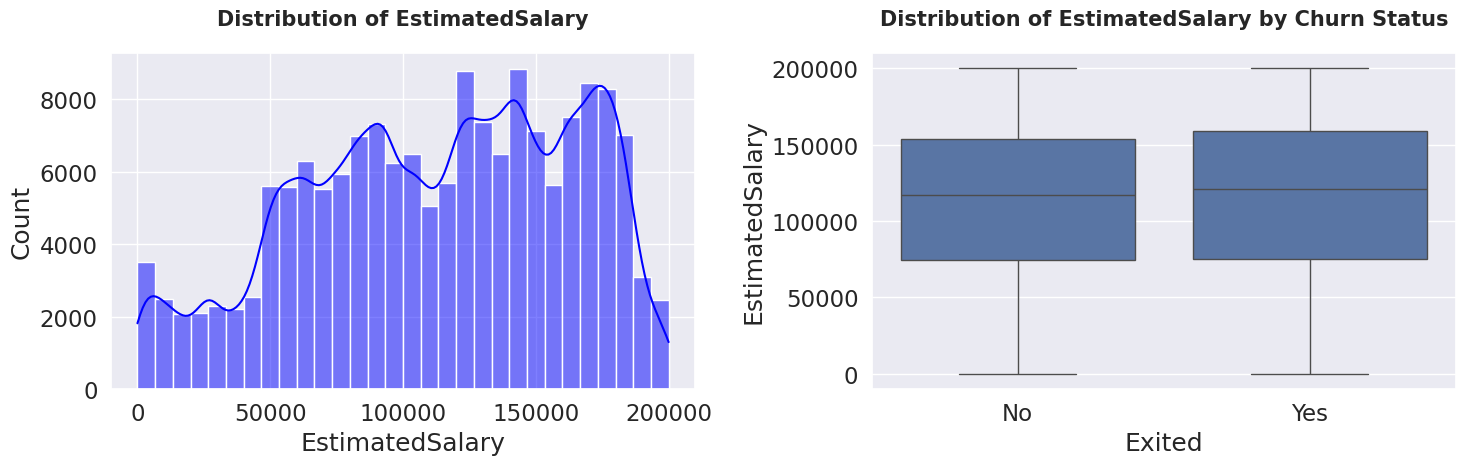

In [ ]:
continous_plot("EstimatedSalary")

In [ ]:
conditions=[(df["NumOfProducts"]==1),(df["NumOfProducts"]==2), (df["NumOfProducts"]>2)]
values=["One product", "Two products","More thans 2 products"]

In [ ]:
df["Total_Products"] = np.select(conditions,values)

In [ ]:
df.drop(columns="NumOfProducts", inplace=True)

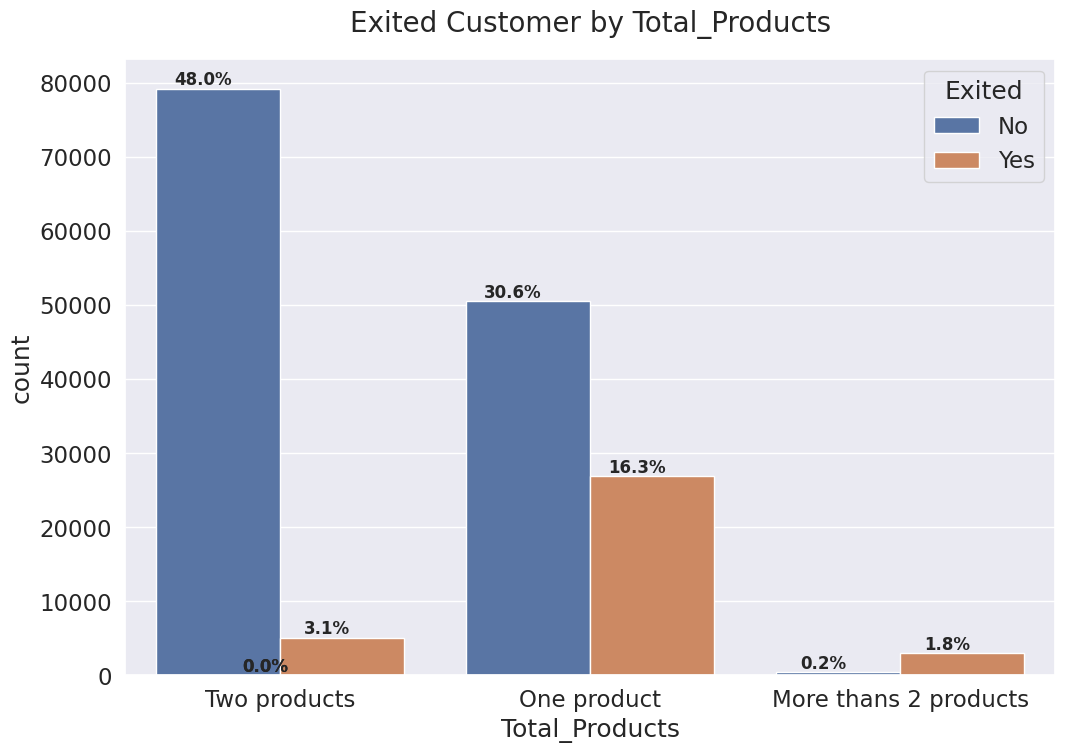

In [ ]:
countplot("Total_Products")

In [ ]:
conditions = [(df["Balance"]==0),(df["Balance"]>0)]
values = ["Zero Balace", "More than Zero Balance"]

In [ ]:
df["Account_Balance"]= np.select(conditions, values)

In [ ]:
df.drop(columns="Balance", inplace=True)

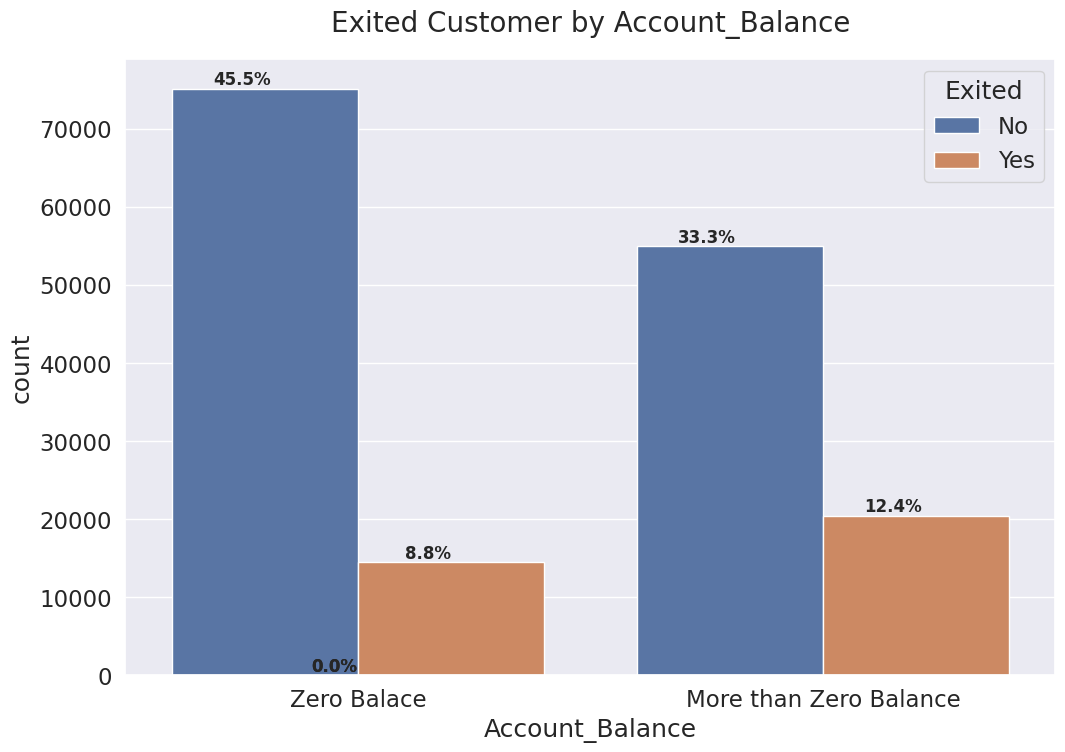

In [ ]:
countplot("Account_Balance")

In [ ]:
cat_cols = ["Geography","Gender","Total_Products","Account_Balance"]

for column in cat_cols:
    print(f"Unique Values in {column} column is:",df[column].unique())
    print("-"*100,"\n")

Unique Values in Geography column is: ['France' 'Spain' 'Germany']
---------------------------------------------------------------------------------------------------- 

Unique Values in Gender column is: ['Male' 'Female']
---------------------------------------------------------------------------------------------------- 

Unique Values in Total_Products column is: ['Two products' 'One product' 'More thans 2 products']
---------------------------------------------------------------------------------------------------- 

Unique Values in Account_Balance column is: ['Zero Balace' 'More than Zero Balance']
---------------------------------------------------------------------------------------------------- 



In [ ]:
df=pd.get_dummies(columns=cat_cols, data=df)

In [ ]:
df["Exited"].replace({"No":0,"Yes":1}, inplace=True)

In [ ]:
df.head()

,CreditScore,Age,Tenure,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Total_Products_More thans 2 products,Total_Products_One product,Total_Products_Two products,Account_Balance_More than Zero Balance,Account_Balance_Zero Balace
0,668,33.0,3,1.0,0.0,181449.97,0,1,0,0,0,1,0,0,1,0,1
1,627,33.0,1,1.0,1.0,49503.50,0,1,0,0,0,1,0,0,1,0,1
2,678,40.0,10,1.0,0.0,184866.69,0,1,0,0,0,1,0,0,1,0,1
3,581,34.0,2,1.0,1.0,84560.88,0,1,0,0,0,1,0,1,0,1,0
4,716,33.0,5,1.0,1.0,15068.83,0,0,0,1,0,1,0,0,1,0,1


In [ ]:
cols=["CreditScore","Age","EstimatedSalary"]

In [ ]:
df[cols].skew().to_frame().rename(columns={0:"Feature Skewness"})

,Feature Skewness
CreditScore,-0.059291
Age,0.968063
EstimatedSalary,-0.309022


In [ ]:
old_age=df["Age"]

In [ ]:
df["Age"]=np.log(df["Age"])

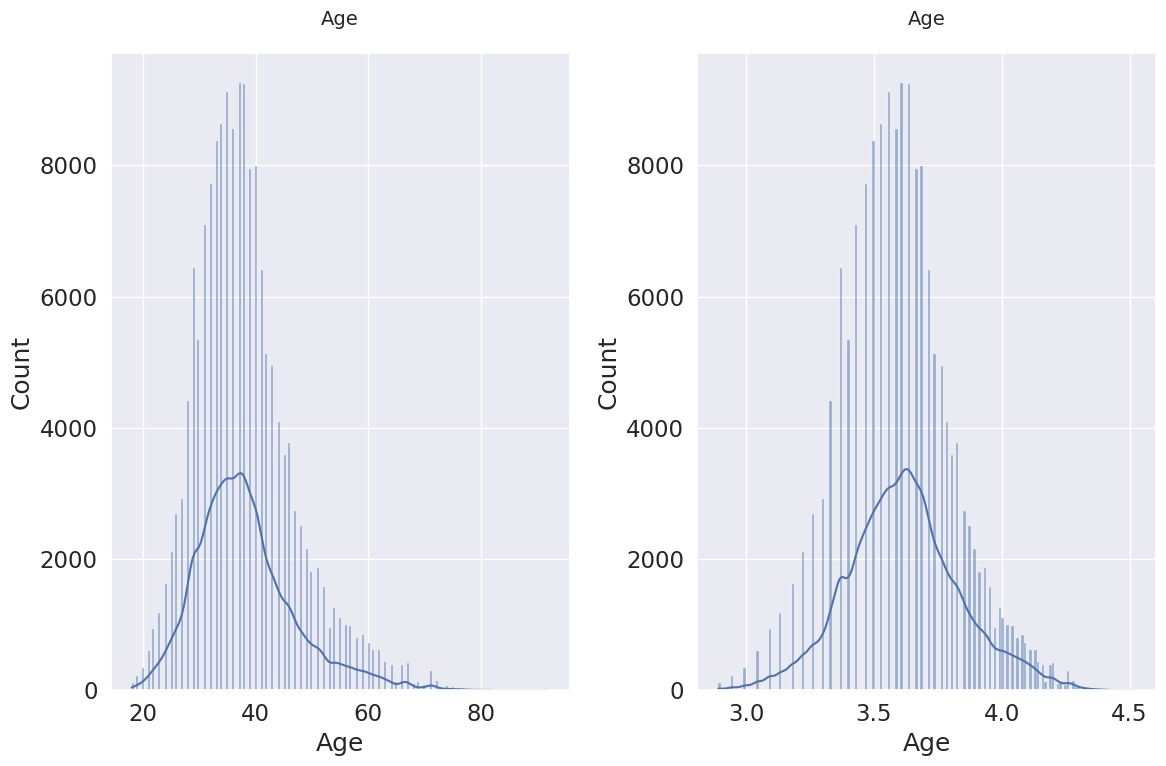

In [ ]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.histplot(old_age, kde=True)
plt.title("Age", fontsize=14, pad=20)

plt.subplot(1,2,2)
sns.histplot(df["Age"], kde=True)
plt.title("Age", fontsize=14, pad=20)
plt.tight_layout()
plt.show()


In [ ]:
!pip install imblearn

In [ ]:
x=df.drop(columns=["Exited"])
y=df["Exited"]

x_train, x_test, y_train, y_test = train_test_split_alternate(x, y, test_size=0.2, random_state=0)

In [ ]:
print("x_train", x_train.shape)
print("x_test", x_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

x_train (132027, 16)
x_test (33007, 16)
y_train (132027,)
y_test (33007,)


In [ ]:
smt=SMOTE(random_state=42)

In [ ]:
x_train_resampled, y_train_resampled=smt.fit_resample(x_train, y_train)

print(x_train_resampled.shape ,y_train_resampled.shape)

(208050, 16) (208050,)


In [ ]:
y_trian_resampled.value_counts().to_frame()

,Exited
0,104025
1,104025


## Modeling

In [ ]:
dtree=DecisionTreeClassifier()

In [ ]:
param_grid = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': [None, 10, 20, 30, 40, 50],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
random_search = RandomizedSearchCV(dtree, param_distributions=param_grid, n_iter=10, cv=5, n_jobs=-1)
random_search.fit(x_train_resampled, y_train_resampled)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'splitter': ['best', 'random']})

In [ ]:
best_parameters = random_search.best_params_

print("Best Parameters for DecisionTree Model is:\n\n")
best_parameters

Best Parameters for DecisionTree Model is:




{'splitter': 'best',
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 10,
 'criterion': 'gini'}

In [ ]:
dtree = DecisionTreeClassifier(**best_parameters)

dtree.fit(x_train_resampled,y_train_resampled)

DecisionTreeClassifier(max_depth=10, max_features='auto', min_samples_split=10)

In [ ]:
y_train_pred = dtree.predict(x_train_resampled)
y_test_pred = dtree.predict(x_test)

print("Accuracy Score of Model on Training Data is =>",round(accuracy_score(y_train_resampled,y_train_pred)*100,2),"%")
print("Accuracy Score of Model on Testing Data  is =>",round(accuracy_score(y_test,y_test_pred)*100,2),"%")

Accuracy Score of Model on Training Data is => 88.52 %
Accuracy Score of Model on Testing Data  is => 83.89 %


In [ ]:
print("F1 Score of the Model is =>",f1_score(y_test,y_test_pred,average="micro"))
print("Recall Score of the Model is =>",recall_score(y_test,y_test_pred,average="micro"))
print("Precision Score of the Model is =>",precision_score(y_test,y_test_pred,average="micro"))

F1 Score of the Model is => 0.8389129578574241
Recall Score of the Model is => 0.8389129578574241
Precision Score of the Model is => 0.8389129578574241


In [ ]:
imp_df = pd.DataFrame({"Feature Name":x_train.columns,
                       "Importance":dtree.feature_importances_})

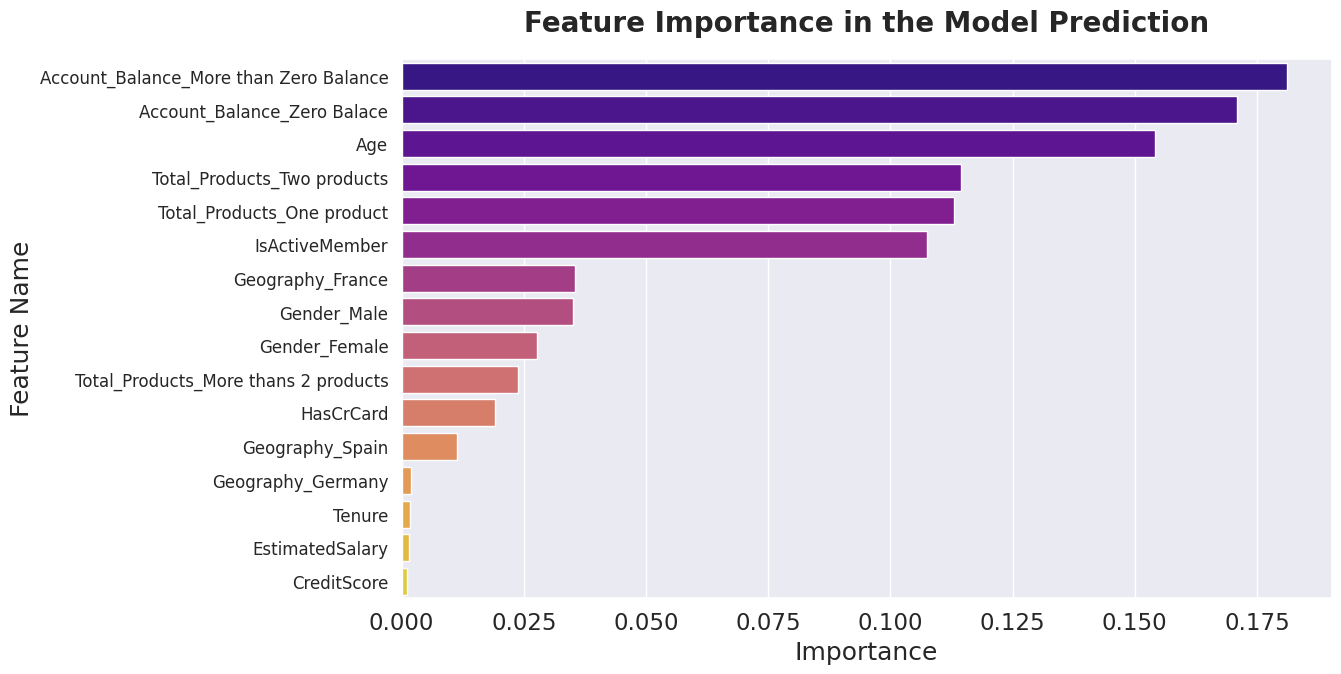

In [ ]:
features = imp_df.sort_values(by="Importance",ascending=False)

plt.figure(figsize=(12,7))
sns.barplot(x="Importance", y="Feature Name", data=features, palette="plasma")
plt.title("Feature Importance in the Model Prediction", fontweight="black", size=20, pad=20)
plt.yticks(size=12)
plt.show()

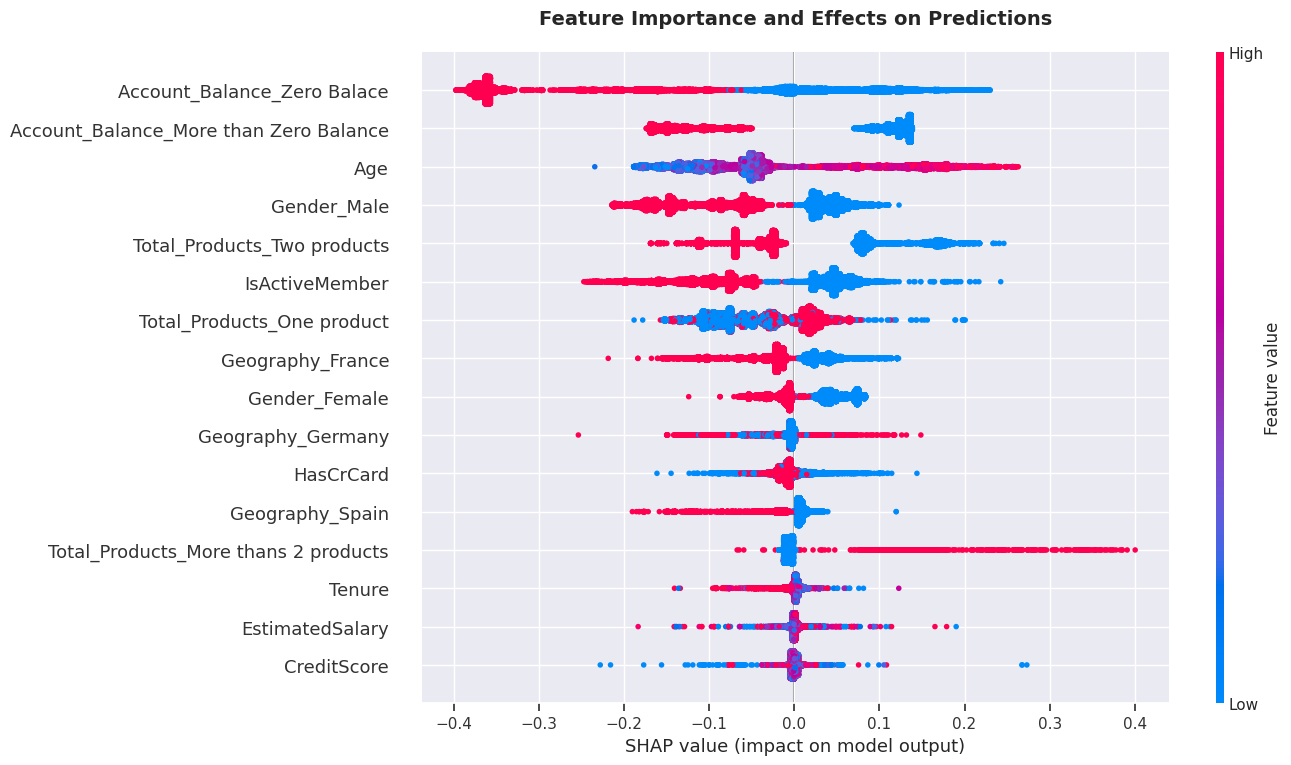

In [ ]:
explainer=shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(x_test)

plt.title("Feature Importance and Effects on Predictions", fontsize=14, weight="black", pad=20)
shap.summary_plot(shap_values[1], x_test.values, feature_names=x_test.columns, plot_size=(14, 8))


* 두개 이상 가지고 있는 사람이 이탈율이 낮음
* 나이가 높아질 수록 낮음
* 남자가 낮음

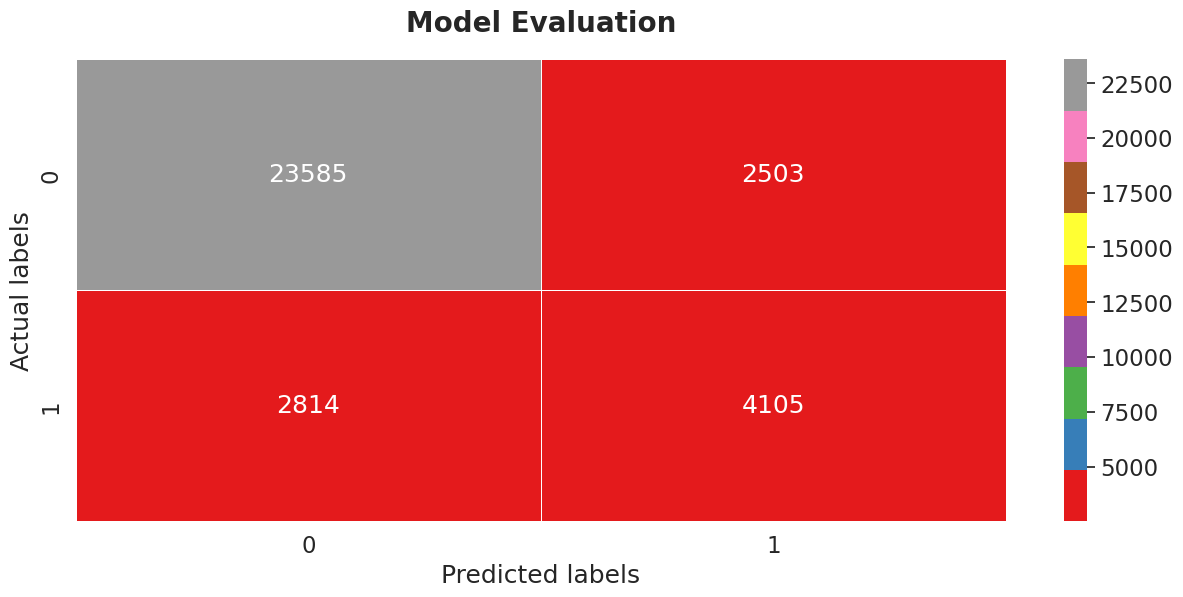

In [ ]:
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(15,6))
sns.heatmap(data=cm, linewidth=0.5, annot=True, fmt="g", cmap="Set1")
plt.title("Model Evaluation", fontsize=20, pad=20, fontweight="black")
plt.ylabel("Actual labels")
plt.xlabel("Predicted labels")
plt.show()

In [ ]:
RF = RandomForestClassifier()

In [ ]:
param_dist = {"max_depth":[3,4,5,6,7,8],
              "min_samples_split":[3,4,5,6,7,8],
              "min_samples_leaf":[3,4,5,6,7,8],
              "n_estimators": [50,70,90,100],
              "criterion":["gini","entropy"]}

In [ ]:
rfc = RandomForestClassifier()
random_search = RandomizedSearchCV(rfc, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1)
random_search.fit(x_train_resampled, y_train_resampled)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 4, 5, 6, 7, 8],
                                        'min_samples_leaf': [3, 4, 5, 6, 7, 8],
                                        'min_samples_split': [3, 4, 5, 6, 7, 8],
                                        'n_estimators': [50, 70, 90, 100]})

In [ ]:
best_parameters = random_search.best_params_

print("Best Parameters for RandomForest Model is:\n")
best_parameters

Best Parameters for RandomForest Model is:



{'n_estimators': 70,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_depth': 8,
 'criterion': 'gini'}

In [ ]:
rfc = RandomForestClassifier(**best_parameters)

rfc.fit(x_train_resampled,y_train_resampled)

RandomForestClassifier(max_depth=8, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=70)

In [ ]:
!pip install scikit-learn

In [ ]:
y_train_pred=rfc.predict(x_train_resampled)
y_test_pred=rfc.predict(x_test)

print("Accuracy Score of Model on Training Data is => ", round(accuracy_score(y_train_resampled, y_train_pred)*100,2),"%")
print("Accuracy Score of Model on Testing Data is =>", round(accuracy_score(y_test, y_test_pred)*100,2),"%")

Accuracy Score of Model on Training Data is =>  90.54 %
Accuracy Score of Model on Testing Data is => 85.62 %


In [ ]:
print("F1 Score of the Model is =>", f1_score(y_test, y_test_pred, average="micro"))
print("Recall Score of the Model is =>", recall_score(y_test, y_test_pred, average="micro"))
print("Precision Score of the Model is =>", precision_score(y_test, y_test_pred, average="micro"))

F1 Score of the Model is => 0.8561517253915836
Recall Score of the Model is => 0.8561517253915836
Precision Score of the Model is => 0.8561517253915836


In [ ]:
imp_df=pd.DataFrame({"Feature Name":x_train.columns,
              "Importance":rfc.feature_importances_})

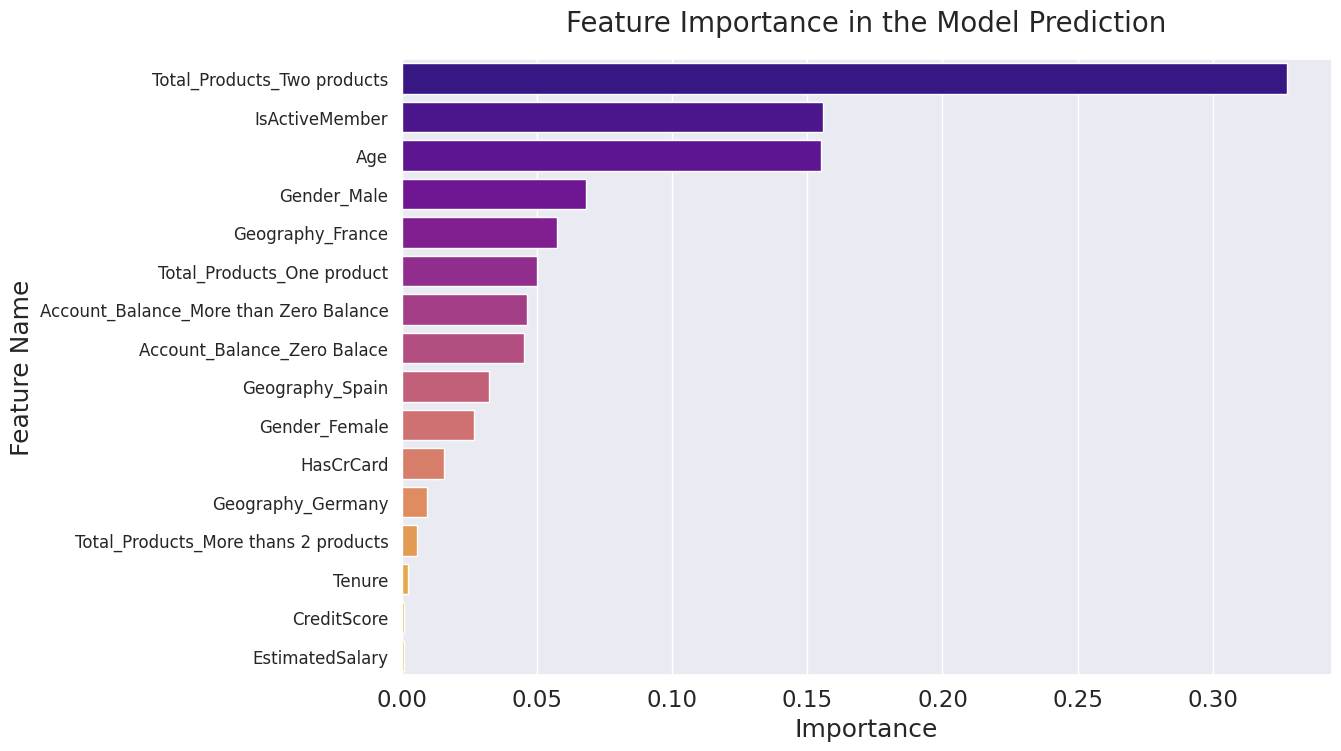

In [ ]:
features=imp_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(x="Importance", y="Feature Name", data=features, palette="plasma")
plt.title("Feature Importance in the Model Prediction", size=20, pad=20)
plt.yticks(size=12)
plt.show()

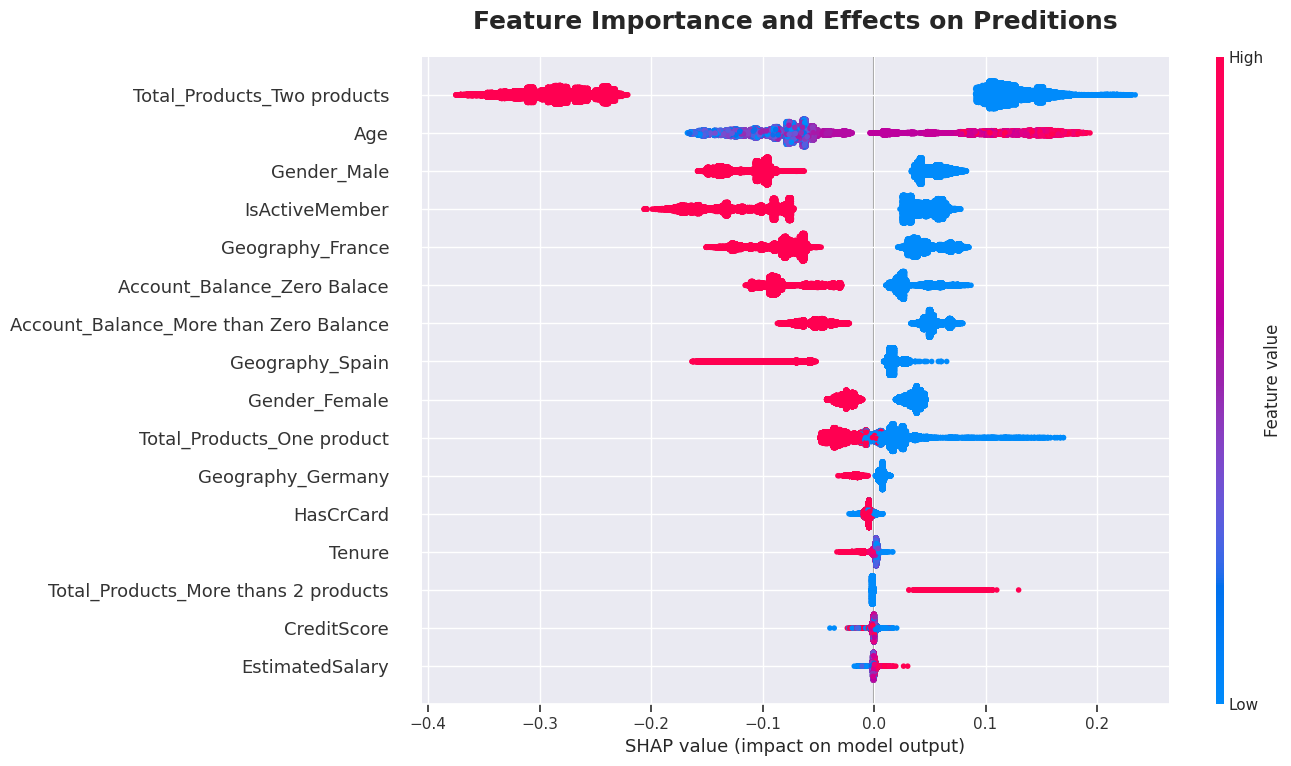

In [ ]:
explainer=shap.TreeExplainer(rfc)
shap_values=explainer.shap_values(x_test)

plt.title("Feature Importance and Effects on Preditions", fontweight="black", pad=20, size=18)
shap.summary_plot(shap_values[1], x_test.values, feature_names = x_test.columns,plot_size=(14,8))

* 2개 이상 가지고 있는 사람이 이탈할 가능성 낮음
* 나이가 높을수록 이탈 가능성 낮음
* 남자가 이탈 가능성이 낮음

* 모델 정확함
* 1로 예측한 데이터 중 실제 0인 데이터 비율이 높음
* 개선하기 위해 데이터가 더 필요할 것

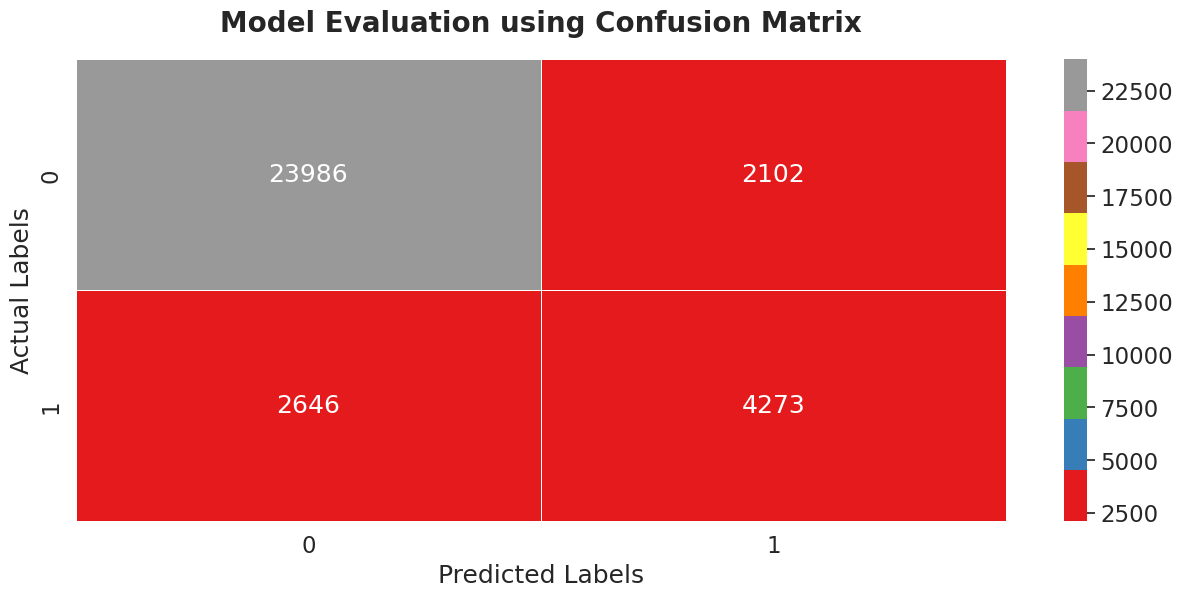

In [ ]:
cm = confusion_matrix(y_test,y_test_pred)

plt.figure(figsize=(15,6))
sns.heatmap(data=cm, linewidth=.5, annot=True, fmt="g", cmap="Set1")
plt.title("Model Evaluation using Confusion Matrix",fontsize=20,pad=20,fontweight="black")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.show()

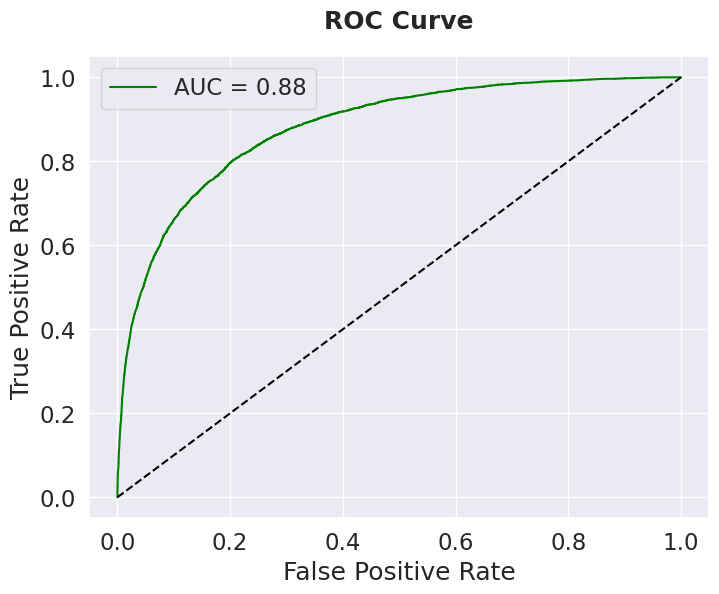

In [ ]:
y_pred_proba = rfc.predict_proba(x_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=["y_actual"])])
df_actual_predicted.index = y_test.index


fpr, tpr, thresholds = roc_curve(df_actual_predicted["y_actual"], y_pred_proba)
auc = roc_auc_score(df_actual_predicted["y_actual"], y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}",color="green")
plt.plot([0, 1], [0, 1], linestyle="--", color="black")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve",pad=20,fontweight="black")
plt.legend()
plt.show()



In [ ]:
# prompt: test 데이터로 실행

y_test_pred = dtree.predict(x_test)
print("Accuracy Score of Model on Testing Data is =>", round(accuracy_score(y_test, y_test_pred)*100,2),"%")
print("F1 Score of the Model is =>", f1_score(y_test, y_test_pred, average="micro"))
print("Recall Score of the Model is =>", recall_score(y_test, y_test_pred, average="micro"))
print("Precision Score of the Model is =>", precision_score(y_test, y_test_pred, average="micro"))


Accuracy Score of Model on Testing Data is => 83.89 %
F1 Score of the Model is => 0.8389129578574241
Recall Score of the Model is => 0.8389129578574241
Precision Score of the Model is => 0.8389129578574241


In [ ]:
from google.colab import drive
submission = pd.DataFrame({'ID': x_test.index, 'Exited': y_test_pred})
submission.to_csv('/content/drive/MyDrive/Colab Notebooks/bank churn/submissiond.csv', index=False)